In [1]:
import numpy as np
import matplotlib.pyplot as plt

import parameters as prms
import simulate_stimuli as stimuli
import simulate_trajectories as traj
import numerical_fokker_plank as fkp
import find_best_params as fitting
import graphics

# Reloading modules automatically :
%load_ext autoreload
%autoreload 2

parameters imported
simulated_stimuli imported
simulate_trajectories imported
numerical_fokker_plank imported
find_best_params imported
graphics imported


In [2]:
help(prms)

Help on module parameters:

NAME
    parameters - PARAMETERS

DESCRIPTION
    >> Free parameters, to be fitted to data
    rho     Biais, threshold to output a decision by comparing the value of a at the end of the trial.
    b       Sticky decision bound, amount of evidence necessary to commit to a decision.
    l       Lapse rate, fraction of trials on which a random response is made.
    sgm_i   Noise in the initial value of a.
    sgm_a   Diffusion constant, noise in a.
    sgm_s   Noise when adding evidence from one pulse (scaled by C amplitude).
    lbda    Consistent drift in a.
            - leaky or forgetful case : lbda < 0 (drift toward a = 0, and later pulses affect the decision more than earlier pulses).
            - unstable or impulsive case : lbda > 0 (drift away from a = 0, and earlier pulses affect the decision more than later pulses).
    tau     Memory time constant, tau = abs(1/lbda)
    phi     Adaptation strength, factor by which C is multiplied following a puls

## Stimuli

Number of trials : 10
Stimuli - Trial 1 :


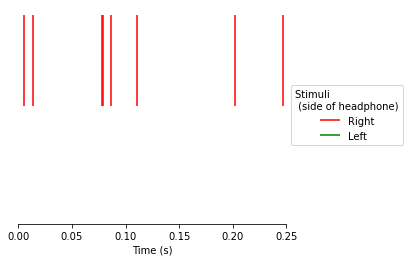

In [3]:
trials = stimuli.generate_experiment(prms.params_sim)
print('Number of trials :', len(trials))
times_r, times_l, stim_R, stim_L = trials[0]['times_r'], trials[0]['times_l'], trials[0]['stim_R'], trials[0]['stim_L']
print('Stimuli - Trial 1 :')
graphics.show_trial(times_r, times_l, prms.params_sim)

## Euler Method

Test parameters : {'lbda': 1, 'b': 30, 'sgm_a': 0.0, 'sgm_s': 1.0, 'sgm_i': 0, 'phi': 1.2, 'tau_phi': 0.04, 'rho': 0, 'l': 0}
Number of simulations per trial : 10


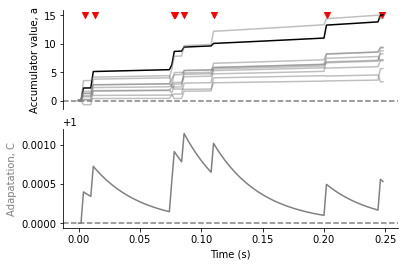

Test parameters : {'lbda': 1, 'b': 30, 'sgm_a': 8.366600265340756, 'sgm_s': 0.0, 'sgm_i': 0, 'phi': 1.2, 'tau_phi': 0.04, 'rho': 0, 'l': 0}
Number of simulations per trial : 10


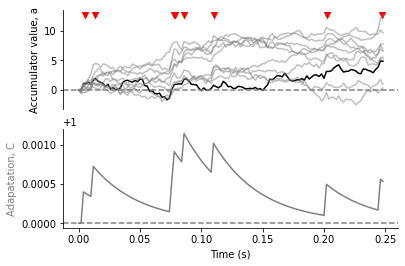

In [4]:
print('Test parameters :',prms.theta_test1)
trajectories = traj.generate_trajectories(trials, prms.params_sim, prms.theta_test1, ntraj=10)
print('Number of simulations per trial :', len(trajectories[0]['a_evols']))
graphics.show_trajectories(trajectories[0], times_r, times_l, prms.params_sim, prms.theta_test1)
# print(trajectories[0]['C_evol'])

print('Test parameters :',prms.theta_test2)
trajectories = traj.generate_trajectories(trials, prms.params_sim, prms.theta_test2, ntraj=10)
print('Number of simulations per trial :', len(trajectories[0]['a_evols']))
graphics.show_trajectories(trajectories[0], times_r, times_l, prms.params_sim, prms.theta_test2)

Optimal parameters : {'lbda': 0, 'b': 30, 'sgm_a': 0, 'sgm_s': 0, 'sgm_i': 0, 'phi': 1, 'tau_phi': 0.1, 'rho': 0, 'l': 0}
Number of simulations per trial : 10


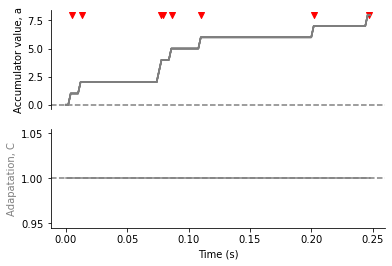

In [5]:
print('Optimal parameters :', prms.theta_opt)
trajectories = traj.generate_trajectories(trials, prms.params_sim, prms.theta_opt, ntraj=10)
print('Number of simulations per trial :', len(trajectories[0]['a_evols']))
graphics.show_trajectories(trajectories[0], times_r, times_l, prms.params_sim, prms.theta_opt)

## Fokker Plank method

In [6]:
stim_R, stim_L = trials[0]['stim_R'], trials[0]['stim_L']

In [131]:
%time X, F, Pa, p_L, _ = fkp.solve_fokker_plank(stim_R, stim_L, gradient=False)
print(np.sum(F[:,:,0], axis=0))

numerical_fokker_plank imported
Inputs history
Ornstein Uhlenbeck
Sum Ps :  [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1.]
Forward transition matrix
(241, 451, 1)
Intervals and Masks
Weights
Transient states
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38

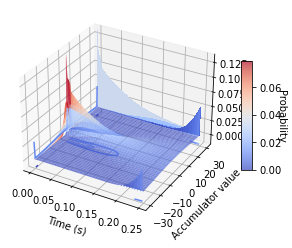

In [51]:
graphics.show_distribution(Pa, X)

## Posterior probability

1.0


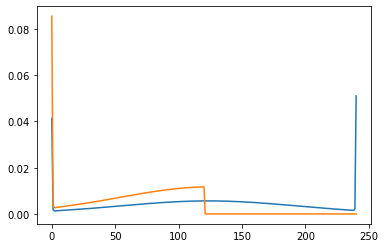

In [52]:
PaT = Pa[:,-1]
d = 'L'
dx = 0.25
rho = 0
nbx = len(X)
pb0 = fitting.initialize_posterior_distribution(d, PaT, X, dx, rho)
print(np.sum(pb0))
plt.plot(PaT)
plt.plot(pb0)
plt.show()

Maximum value in B : 1.0
Sum across lines :
 [[1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 ...
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]]
Number of problematic divisions by 0 : 2
Pi =  5e-324 Ft =  0.003413058362126456
Pi =  5e-324 Ft =  0.0034130583621264548
Negligible -> replaced by 0


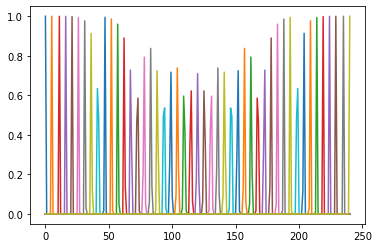

In [116]:
B = fitting.backward_transition_matrix(F, Pa)

for i in np.arange(0,len(X),5):
    plt.plot(B[i,:,0])
plt.show()

[0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1.]


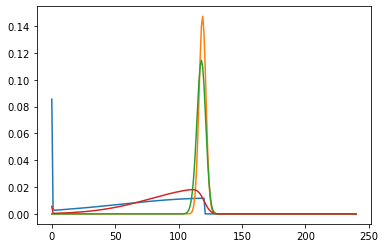

In [124]:
Pb = fitting.posterior_probability_distribution(pb0, B)
print(np.sum(Pb, axis=0))
plt.plot(pb0)
for t in [1,2,100]:
    plt.plot(Pb[:,t])
plt.show()

In [128]:
dL = fitting.gradient_L(Pa, Pb, F)
print(dL)

find_best_params imported
nan
nan
nan


/media/esther/Data/Travail/Modelisation/Neurosciences_computationnelles/E33_Theoretical_neuroscience/Presentation_article/Codes/find_best_params.py:144: RuntimeWarning: overflow encountered in true_divide
  nbx = Pa.shape[0]
/media/esther/Data/Travail/Modelisation/Neurosciences_computationnelles/E33_Theoretical_neuroscience/Presentation_article/Codes/find_best_params.py:144: RuntimeWarning: invalid value encountered in multiply
  nbx = Pa.shape[0]


## Gradient

In [138]:
gradient = True
%time X, F, Pa, p_L, dF_ds = fkp.solve_fokker_plank(stim_R, stim_L, gradient=gradient)
print(np.sum(F[:,:,0], axis=0))

numerical_fokker_plank imported
Inputs history
Ornstein Uhlenbeck
Sum Ps :  [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1.]
Forward transition matrix
Intervals and Masks
Weights
Transient states
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
4

find_best_params imported


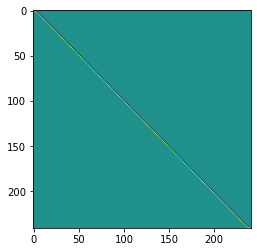

In [139]:
plt.imshow(dF_ds[:,:,0])
plt.show()

In [154]:
dF_dlbda, dF_dsgm_a, dF_dsgm_s, dF_dphi, dF_dtphi, dF_db = fitting.gradient_F(dF_ds, X, stim_R, stim_L)

find_best_params imported
(125,)
(125,)
Sum Ps :  [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1.]


ValueError: operands could not be broadcast together with shapes (1,451,125) (241,241,125) 

## Likelihood

In [28]:
trials  = stimuli.experiment(n_trials=3)
D = fitting.generate_data(trials)

dx 0.25
Ornstein Uhlenbeck
ds 0.125 Ds 4.732863826479693
(241, 75, 13)
Forward transition matrix
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
Fokker Plank
dx 0.25
cancelation
Ornstein Uhlenbeck
ds 

In [33]:
L = fitting.log_likelihood(D, trials)

find_best_params imported
dx 0.25
Ornstein Uhlenbeck
ds 0.125 Ds 4.732863826479693
(241, 75, 13)
Forward transition matrix
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
Fokker Plank
dx 0.25
cancelat

In [34]:
print(L)

-6.159051734438515


## Tests

### Keyword arguments

To be used in terminal functions (not in intermediary ones).

In [24]:
def test(a,b, dt=2):
    print("OK")

params = {"a":0, "b":-1}
test(**params)

OK


Two dictionaries can be given, but all non default parameters should be contained in them.

In [25]:
params1 = {"a":0}
params2 = {"b":-1}
test(**params1, **params2)

OK


A dictionary can overwrite a default parameter.

In [26]:
params3 ={"a":0, "b":-1, "dt":3}
test(**params3)

OK


In [100]:
l = A.shape[0]
print(l)
print(A[:,:-1])

2
[[2]
 [5]]


In [171]:
A = np.array([[2, 3, 7],
              [4, 6, 3]])

W = A[(A>=3)*(A<=4)]
print(W)

[3 4 3]


In [ ]:
np.apply_over_axes(func, a, axes)

In [101]:
A = np.zeros((2,5))
A2 = np.stack([A for k in range(3)], axis=1)
A3 = np.stack([A for k in range(3)], axis=0)
A4 = np.stack([A for k in range(3)], axis=2)
print(A2)
print(A2.shape, A3.shape, A4.shape)
print(A3)

[[[0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0.]]

 [[0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0.]]]
(2, 3, 5) (3, 2, 5) (2, 5, 3)
[[[0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0.]]

 [[0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0.]]

 [[0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0.]]]


In [23]:
def attribute_closest(S, X):
    '''Finds the larger element of X smaller than s.'''
#     x_low = X[X < s].max()
#     x_low = max([x for x in X if x < s])
#     x_low = max([x*(x<s) for x in X])
    x_low = X[0]*np.ones(S.shape)
    for x in X:
        S[S>x] = x
    x_low = X[list_X]
    return x_low

S = np.array([[0,1,2],
             [3,4,5]])

X = [-1,0,1,2,3,4]

import functools
attribute_closest_X = functools.partial(attribute_closest, X=X)

D = list(map(attribute_closest_X, S)) 

# D = attribute_closest_X(S)
print(D)

0
[ True  True  True]


ValueError: setting an array element with a sequence.

In [43]:
S = np.array([[0,1,2],
             [3,4,5]])
S = np.stack([S, S+1, S+2, S+3], axis=2)
print(S.shape)
T = 4
X = [1,2]
nbx = len(X)

F = np.zeros((nbx,nbx,T))

i_low = np.zeros(S.shape)
X_low = np.zeros(S.shape)
X_up = np.zeros(S.shape)
for i in range(len(X)-1):
    mask = (S>=X[i])&(S<X[i+1])
    i_low[mask] = i
    X_low[mask] = X[i]
    X_up[mask] = X[i+1]
W_low = S - X_low
W_up = X_up - S
print(i_low)
print(W_low)
for i in range(len(X)):
    for j in range(len(X)):
        for t in range(T):
            mask = (i_low[j,:,t]==i)
            F[i,j,t] = np.sum(S[j,:,t][mask]*W_low[j,:,t][mask])
print(F)



(2, 3, 4)
[[[0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]]

 [[0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]]]
[[[0. 0. 2. 3.]
  [0. 2. 3. 4.]
  [2. 3. 4. 5.]]

 [[3. 4. 5. 6.]
  [4. 5. 6. 7.]
  [5. 6. 7. 8.]]]
[[[  4.  13.  29.  50.]
  [ 50.  77. 110. 149.]]

 [[  0.   0.   0.   0.]
  [  0.   0.   0.   0.]]]


In [34]:
A = np.array([[[275, 441, 494, 593]],
       [[679, 533, 686]],
       [[559, 219, 455]],
       [[605, 468, 692, 613]]], dtype=object)
print(A)

[[list([275, 441, 494, 593])]
 [list([679, 533, 686])]
 [list([559, 219, 455])]
 [list([605, 468, 692, 613])]]


In [45]:
def split_mass(s, x_low, x_up):
    

/home/esther/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until
/home/esther/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until
/home/esther/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in true_divide
  after removing the cwd from sys.path.
/home/esther/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in true_divide
  after removing the cwd from sys.path.


**Enumerate**

In [67]:
G = np.array([[ 0.79,  0.84,  0.84],
                    [ 0.87,  0.93,  0.78],
                    [ 0.77,  1.00,  0.87],
                    [ 0.66,  0.75,  0.82],
                   [ 0.84,  0.89,  0.76],
                    [ 0.83,  0.71,  0.85]])

B = np.zeros_like(G)
for n, row in enumerate(G):
    print(row)
    B[n] = val - 3
print(B)

[0.79 0.84 0.84]
[0.87 0.93 0.78]
[0.77 1.   0.87]
[0.66 0.75 0.82]
[0.84 0.89 0.76]
[0.83 0.71 0.85]
[[-2.17 -2.29 -2.15]
 [-2.17 -2.29 -2.15]
 [-2.17 -2.29 -2.15]
 [-2.17 -2.29 -2.15]
 [-2.17 -2.29 -2.15]
 [-2.17 -2.29 -2.15]]


**Broadcasting**   

Rules of Broadcasting:
To determine if two arrays are broadcast-compatible, align the entries of their shapes such that their trailing dimensions are aligned, and then check that each pair of aligned dimensions satisfy either of the following conditions:
- the aligned dimensions have the same size
- one of the dimensions has a size of 1
The two arrays are broadcast-compatible if either of these conditions are satisfied for each pair of aligned dimensions.  

Examples :   

     array-1: 4 x 3  
     array-2:     3  
     result:  4 x 3  

    array-1:         8  
    array-2: 5 x 2 x 8  
    result:  5 x 2 x 8    

     array-1:     4 x 2  
     array-2: 5 x 4 x 2  
    result:   5 x 4 x 2  

     array-1:     5 x 2  
     array-2: 5 x 4 x 2  
    result: INCOMPATIBLE

     array-1: 5 x 1 x 3 x 2  
     array-2:     9 x 1 x 2  
    result:   5 x 9 x 3 x 2  

     array-1: 1 x 3 x 2  
     array-2:     8 x 2  
    result: INCOMPATIBLE  
    
    
For broadcasting, it is relevant to reshape an array to introduce size-1 dimensions.
The size of the array is preserved (same number of values), regardless of introducing these extra size-1 dimensions.

In [54]:
# Broadcast multiplications between a shape-(3, 1, 2) array and a shape-(3, 1) array produces shape-(3, 3, 2).
x = np.array([[[0, 1]],
               [[2, 3]],
               [[4, 5]]])
y = np.array([[ 0],
               [ 1],
               [-1]])
x * y

array([[[ 0,  0],
        [ 0,  1],
        [ 0, -1]],

       [[ 0,  0],
        [ 2,  3],
        [-2, -3]],

       [[ 0,  0],
        [ 4,  5],
        [-4, -5]]])

In [58]:
# Reshaping : two methods

np.array([1, 2, 3]).reshape(1, 3, 1, 1)

x= np.array([1, 2, 3])
y= x[np.newaxis, :, np.newaxis, np.newaxis]
print(y)
print(y.shape)

[[[[1]]

  [[2]]

  [[3]]]]
(1, 3, 1, 1)


In [60]:
# Inserting size-1 dimensions into x and y in # preparation of broadcasting.
x_1d = np.array([1, 2, 3])
y = np.array([4, 5, 6, 7])

x = x_1d.reshape(3, 1)
print(x)
print(x * y)

[[1]
 [2]
 [3]]
[[ 4  5  6  7]
 [ 8 10 12 14]
 [12 15 18 21]]


In [64]:
# Computing mean grades
# axis-0 (rows):    student
# axis-1 (columns): exams
grades = np.array([[ 0.79,  0.84,  0.84],
                    [ 0.87,  0.93,  0.78],
                    [ 0.77,  1.00,  0.87],
                    [ 0.66,  0.75,  0.82],
                   [ 0.84,  0.89,  0.76],
                    [ 0.83,  0.71,  0.85]])
mean_exam_scores = grades.mean(axis=0)
# Using broadcasting to subtract a shape-(3,) array from a shape-(6,3) array.
score_offset = grades - mean_exam_scores
print(score_offset)

[[-0.00333333 -0.01333333  0.02      ]
 [ 0.07666667  0.07666667 -0.04      ]
 [-0.02333333  0.14666667  0.05      ]
 [-0.13333333 -0.10333333  0.        ]
 [ 0.04666667  0.03666667 -0.06      ]
 [ 0.03666667 -0.14333333  0.03      ]]


In [65]:
#Pairwise distances
# a shape-(5, 3) array
x = np.array([[ 8.54,  1.54,  8.12],
               [ 3.13,  8.76,  5.29],
              [ 7.73,  6.71,  1.31],
               [ 6.44,  9.64,  8.44],
              [ 7.27,  8.42,  5.27]])

# a shape-(6, 3) array
y = np.array([[ 8.65,  0.27,  4.67],
               [ 7.73,  7.26,  1.95],
               [ 1.27,  7.27,  3.59],
               [ 4.05,  5.16,  3.53],
              [ 4.77,  6.48,  8.01],
              [ 7.85,  6.68,  6.13]])

# Subtract shape-(5, 1, 3) with shape-(1, 6, 3) produces shape-(5, 6, 3)
diffs = x.reshape(5, 1, 3) - y.reshape(1, 6, 3)
diffs.shape

Remark : Consider the largest sized array that is created in the for-loop computation, compared to that of this vectorized computation. The for-loop version need only create a shape-(M,N) array, whereas the vectorized computation creates an intermediate array (i.e. diffs) of shape-(M,N,D). This intermediate array is even created in the one-line version of the code. This will create a massive array if D is a large number.

**Augmented Assignments**  

On NumPy arrays, they behave fundamentally different than their long-form counterparts : they directly update the underlying data referenced by the updated array, rather than creating a distinct array (i.e. array += 3 is more efficient than array = array + 3). 

**Indexing**  

Basic indexing is a view on the array, it does not create new data.  
Advanced indexing : arrays of integers can be used to access arbitrary and even repeated entries from an array, but they always produces a copy of the underlying data.  

In [46]:
 x = np.array([[ -5,   2,  0, -7],
               [ -1,   9,  3,  8],
               [ -3,  -3,  4,  6]])
x[[1, -1]]

array([[-1,  9,  3,  8],
       [-3, -3,  4,  6]])

Converting a Boolean Index-Array to Integer Index-Arrays: numpy.where

In [49]:
x = np.array([[[-0.26,  0.49,  0.18],
               [ 0.43,  0.3 ,  0.29]],
               [[-0.44,  0.3 ,  0.28],
                [ 0.27, -0.09, -0.13]]])

bool_ind = np.array([[[False,  True,  True],
        [ True,  True,  True]],
       [[False,  True,  True],
        [ True, False, False]]], dtype=bool)

ind0, ind1, ind2 = np.where(bool_ind)
print(ind0, ind1, ind2)
x[ind0, ind1, ind2]

[0 0 0 0 0 1 1 1] [0 0 1 1 1 0 0 1] [1 2 0 1 2 1 2 0]


array([0.49, 0.18, 0.43, 0.3 , 0.29, 0.3 , 0.28, 0.27])

Combining advanced and basic indexing techniques.

In [52]:
z = np.array([[[ 0,  1,  2,  3],
               [ 4,  5,  6,  7],
                [ 8,  9, 10, 11]],
             [[12, 13, 14, 15],
              [16, 17, 18, 19],
               [20, 21, 22, 23]]])

ind0 = np.array([True, False])
z[ind0, :, -1] # select sheet-0, all rows, last column

array([[ 3,  7, 11]])

In [92]:
z = np.array([[[ 0,  1,  2,  3],
               [ 4,  5,  6,  7],
                [ 8,  9, 10, 11]],
             [[12, 13, 14, 15],
              [16, 17, 18, 19],
               [20, 21, 22, 23]]])
print(z.shape)
P = np.array([1,2,3])
print(P.shape)
P = P[np.newaxis, :, np.newaxis]
z*P

(2, 3, 4)
(3,)


array([[[ 0,  1,  2,  3],
        [ 8, 10, 12, 14],
        [24, 27, 30, 33]],

       [[12, 13, 14, 15],
        [32, 34, 36, 38],
        [60, 63, 66, 69]]])